# Análise exploratória

## Carregamento dos dados

Carrega as bibliotecas e os dados da base do Global Biotic Interations e da IUCN.

In [51]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

redlist_df = pd.read_csv("../../redlist.csv")
redlist_df

,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude
0,Hexanchus griseus,Near Threatened,Decreasing,Marine,NaN,False,False,NaN,NaN
1,Heosemys annandalii,Critically Endangered,Decreasing,Terrestrial|Freshwater (=Inland waters),Indomalayan,False,False,NaN,NaN
2,Hubbsina turneri,Critically Endangered,Decreasing,Freshwater (=Inland waters),Neotropical,False,False,"[-101.4795, -101.7773, -101.7876]","[19.8745, 19.8256, 19.8273]"
3,Hungerfordia pelewensis,Endangered,Unknown,Terrestrial,Oceanian,False,False,NaN,NaN
4,Ictalurus mexicanus,Vulnerable,Unknown,Freshwater (=Inland waters),Neotropical,False,False,"[-99.35417, -99.3]","[21.98083, 22.0]"
...,...,...,...,...,...,...,...,...,...
50245,Filicium thouarsianum,Near Threatened,Decreasing,Terrestrial,Afrotropical,False,False,"[49.13333, 49.066667, 49.13333, 49.13333, 47.7...","[-18.81666, -18.866667, -18.81666, -18.81666, ..."
50246,Melanophylla angustior,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[47.72611, 47.7322]","[-23.01306, -23.0219]"
50247,Melanophylla madagascariensis,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.2001111, 49.20305, 49.20333, 49.20388, 49....","[-17.9206389, -17.93194, -17.93194, -17.92944,..."
50248,Melanophylla modestei,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.98333, 49.975, 49.975, 49.96666, 49.966667...","[-15.63333, -15.625, -15.625, -15.63333, -15.6..."


In [52]:
gisd_df = pd.read_csv("../../export_gisd.csv", sep=';')
gisd_df = gisd_df.drop(columns=['Unnamed: 7'])
gisd_df

,Species,Kingdom,Phylum,Class,Order,Family,System
0,Abelmoschus moschatus,Plantae,Magnoliophyta,Magnoliopsida,Fabales,Malvaceae,Terrestrial
1,Abrus precatorius,Plantae,Magnoliophyta,Magnoliopsida,Fabales,Fabaceae,Terrestrial
2,Acacia concinna,Plantae,Magnoliophyta,Magnoliopsida,Fabales,Fabaceae,Terrestrial
3,Acacia confusa,Plantae,Magnoliophyta,Magnoliopsida,Fabales,Fabaceae,Terrestrial
4,Acacia farnesiana,Plantae,Magnoliophyta,Magnoliopsida,Fabales,Fabaceae,Terrestrial
...,...,...,...,...,...,...,...
878,Zizania latifolia,Plantae,Magnoliophyta,Liliopsida,Cyperales,Poaceae,Terrestrial
879,Ziziphus mauritiana,Plantae,Magnoliophyta,Magnoliopsida,Rhamnales,Rhamnaceae,Terrestrial
880,Zostera japonica,Plantae,Magnoliophyta,Liliopsida,Najadales,Zosteraceae,Terrestrial
881,Zostera marina,Plantae,Magnoliophyta,Liliopsida,Najadales,Zosteraceae,Terrestrial


In [53]:
interactions_df = pd.read_csv('../../clean-interactions.csv')
interactions_df

,sourceTaxonSpeciesName,sourceTaxonKingdomName,interactionTypeName,targetTaxonSpeciesName,targetTaxonKingdomName
0,Andrena milwaukeensis,Animalia,visitsFlowersOf,Zizia aurea,Plantae
1,Andrena mandibularis,Animalia,visitsFlowersOf,Zanthoxylum americanum,Plantae
2,Andrena edwardsi,Animalia,visitsFlowersOf,Wyethia mollis,Plantae
3,Andrena mandibularis,Animalia,visitsFlowersOf,Viburnum dentatum,Plantae
4,Andrena milwaukeensis,Animalia,visitsFlowersOf,Viburnum lentago,Plantae
...,...,...,...,...,...
922800,Calyptra orthograpta,Animalia,eats,Bubalus bubalis,Animalia
922801,Calyptra orthograpta,Animalia,eats,Cervus unicolor,Animalia
922802,Calyptra orthograpta,Animalia,eats,Elephas maximus,Animalia
922803,Calyptra pseudobicolor,Animalia,eats,Homo sapiens,Animalia


In [15]:
inavasores = []
for index, row in redlist_df.iterrows():
    if (row.longitude == row.longitude):
        lonList = row.longitude.strip('][').split(', ')
        latList = row.latitude.strip('][').split(', ')
        found = False
        for lon_1 in lonList:
            if (found):
                break
            for lon_2 in lonList:
                if (float(lon_2) - float(lon_1) >= 10):
                    inavasores.append(row)
                    found = True
                    break
        for lat_1 in latList:
            if (found):
                break
            for lat_2 in latList:
                if (float(lat_2) - float(lat_1) >= 10):
                    inavasores.append(row)
                    found = True
                    break
df_invasores = pd.DataFrame(inavasores)
df_invasores

,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude
301,Cordia torrei,Endangered,Unknown,Terrestrial,Afrotropical,False,False,"[38.7833, 39.2166, 39.2166, 39.6333, 39.65, 39...","[-4.95, -4.5166, -4.4333, -3.8166, -3.8666, -3..."
309,Blepharispermum arcuatum,Endangered,Unknown,Terrestrial,Afrotropical,False,False,"[49.5666, 38.3333, 36.45, 35.7333, 38.3333]","[-12.65, -4.75, -5.55, -7.7166, -4.6666]"
410,Mostuea microphylla,Near Threatened,Unknown,Terrestrial,Afrotropical,False,False,"[36.5022, 36.503, 37.65, 38.25, 38.5, 38.5166,...","[-8.5722, -8.5727, -1.0333, -8.6666, -8.4166, ..."
418,Ludwigia speciosa,Near Threatened,Unknown,Terrestrial,Afrotropical,False,False,"[36.4947, 36.9666, 37.5952, 38.75]","[-8.5672, -16.7666, -6.1419, -8.0]"
560,Zannichellia obtusifolia,Near Threatened,Decreasing,Freshwater (=Inland waters),Palearctic,False,False,"[-8.70130402, -8.61190796, -7.82122601, -7.591...","[40.60876679, 37.13842453, 37.08871275, 37.528..."
...,...,...,...,...,...,...,...,...,...
50154,Divia briandi,Near Threatened,Unknown,Marine,Nearctic|Neotropical|Palearctic,False,False,"[-44.97850037, -44.95000076, -44.86330032, -32...","[14.75199986, 23.36829948, 12.97329998, 37.293..."
50155,Trillium camschatcense,Vulnerable,Decreasing,Terrestrial,Palearctic,False,False,"[142.2197, 142.2197, 142.244, 142.1097, 157.53...","[44.7661, 44.7661, 44.749, 44.8074, 53.320926,..."
50224,Cinereomyces dilutabilis,Near Threatened,Decreasing,Terrestrial,Neotropical,False,False,"[-85.61006699, -53.72152234, -49.6125, -48.560...","[10.85180099, -29.71896847, -28.027222, -27.71..."
50230,Pleurotus rickii,Near Threatened,Decreasing,Terrestrial,Neotropical,False,False,"[-65.3823686, -65.342415, -51.175781, -51.1319...","[-26.78817924, -26.802286, -30.099809, -29.758..."


In [91]:
gisd_redlist_df = pd.merge(gisd_df[['Species']], redlist_df, left_on=['Species'], right_on=['scientificName'], how='inner')
gisd_redlist_df

,Species,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude
0,Alectoris chukar,Alectoris chukar,Near Threatened,Decreasing,Terrestrial,Palearctic,False,False,NaN,NaN
1,Ammotragus lervia,Ammotragus lervia,Vulnerable,Decreasing,Terrestrial,Afrotropical|Palearctic,False,False,NaN,NaN
2,Ammotragus lervia,Ammotragus lervia,Vulnerable,Decreasing,Terrestrial,Afrotropical|Palearctic,False,False,NaN,NaN
3,Anolis lineatus,Anolis lineatus,Near Threatened,Decreasing,Terrestrial,Neotropical,False,False,NaN,NaN
4,Bacopa monnieri,Bacopa monnieri,Endangered,Stable,Terrestrial|Freshwater (=Inland waters),Palearctic,False,False,NaN,NaN
5,Cedrela odorata,Cedrela odorata,Vulnerable,Decreasing,Terrestrial,Neotropical,False,False,NaN,NaN
6,Cercopithecus mona,Cercopithecus mona,Near Threatened,Decreasing,Terrestrial,Afrotropical,False,False,NaN,NaN
7,Cyprinus carpio,Cyprinus carpio,Vulnerable,Unknown,Freshwater (=Inland waters),Palearctic,False,False,NaN,NaN
8,Cyprinus carpio,Cyprinus carpio,Vulnerable,Unknown,Freshwater (=Inland waters),Palearctic,False,False,NaN,NaN
9,Erythrocebus patas,Erythrocebus patas,Near Threatened,Decreasing,Terrestrial,Afrotropical,False,False,NaN,NaN


In [55]:
gisd_redlist_interactions_df = pd.merge(gisd_df[['Species']], interactions_df, left_on=['Species'], right_on=['sourceTaxonSpeciesName'], how='inner')
gisd_redlist_interactions_df = pd.merge(gisd_redlist_interactions_df, redlist_df, left_on=['targetTaxonSpeciesName'], right_on=['scientificName'], how='inner')
gisd_redlist_interactions_df

,Species,sourceTaxonSpeciesName,sourceTaxonKingdomName,interactionTypeName,targetTaxonSpeciesName,targetTaxonKingdomName,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude
0,Abrus precatorius,Abrus precatorius,Plantae,interactsWith,Bombus pensylvanicus,Animalia,Bombus pensylvanicus,Vulnerable,Decreasing,Terrestrial,Nearctic,False,False,NaN,NaN
1,Bidens pilosa,Bidens pilosa,Plantae,interactsWith,Bombus pensylvanicus,Animalia,Bombus pensylvanicus,Vulnerable,Decreasing,Terrestrial,Nearctic,False,False,NaN,NaN
2,Rosa bracteata,Rosa bracteata,Plantae,interactsWith,Bombus pensylvanicus,Animalia,Bombus pensylvanicus,Vulnerable,Decreasing,Terrestrial,Nearctic,False,False,NaN,NaN
3,Acacia nilotica,Acacia nilotica,Plantae,hasVector,Giraffa camelopardalis,Animalia,Giraffa camelopardalis,Vulnerable,Decreasing,Terrestrial,Afrotropical,False,False,NaN,NaN
4,Acacia nilotica,Acacia nilotica,Plantae,hasVector,Loxodonta africana,Animalia,Loxodonta africana,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,West Nile virus,West Nile virus,Viruses,hasHost,Aegypius monachus,NaN,Aegypius monachus,Near Threatened,Decreasing,Terrestrial,Afrotropical|Indomalayan|Palearctic,False,False,NaN,NaN
885,Xylella fastidiosa,Xylella fastidiosa,Bacteria,hasHost,Coffea arabica,Plantae,Coffea arabica,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,NaN,NaN
886,Yersinia pestis,Yersinia pestis,NaN,pathogenOf,Mustela nigripes,Animalia,Mustela nigripes,Endangered,Decreasing,Terrestrial,Nearctic,False,False,NaN,NaN
887,Yersinia pestis,Yersinia pestis,NaN,pathogenOf,Spilogale putorius,Animalia,Spilogale putorius,Vulnerable,Decreasing,Terrestrial,Nearctic,False,False,NaN,NaN


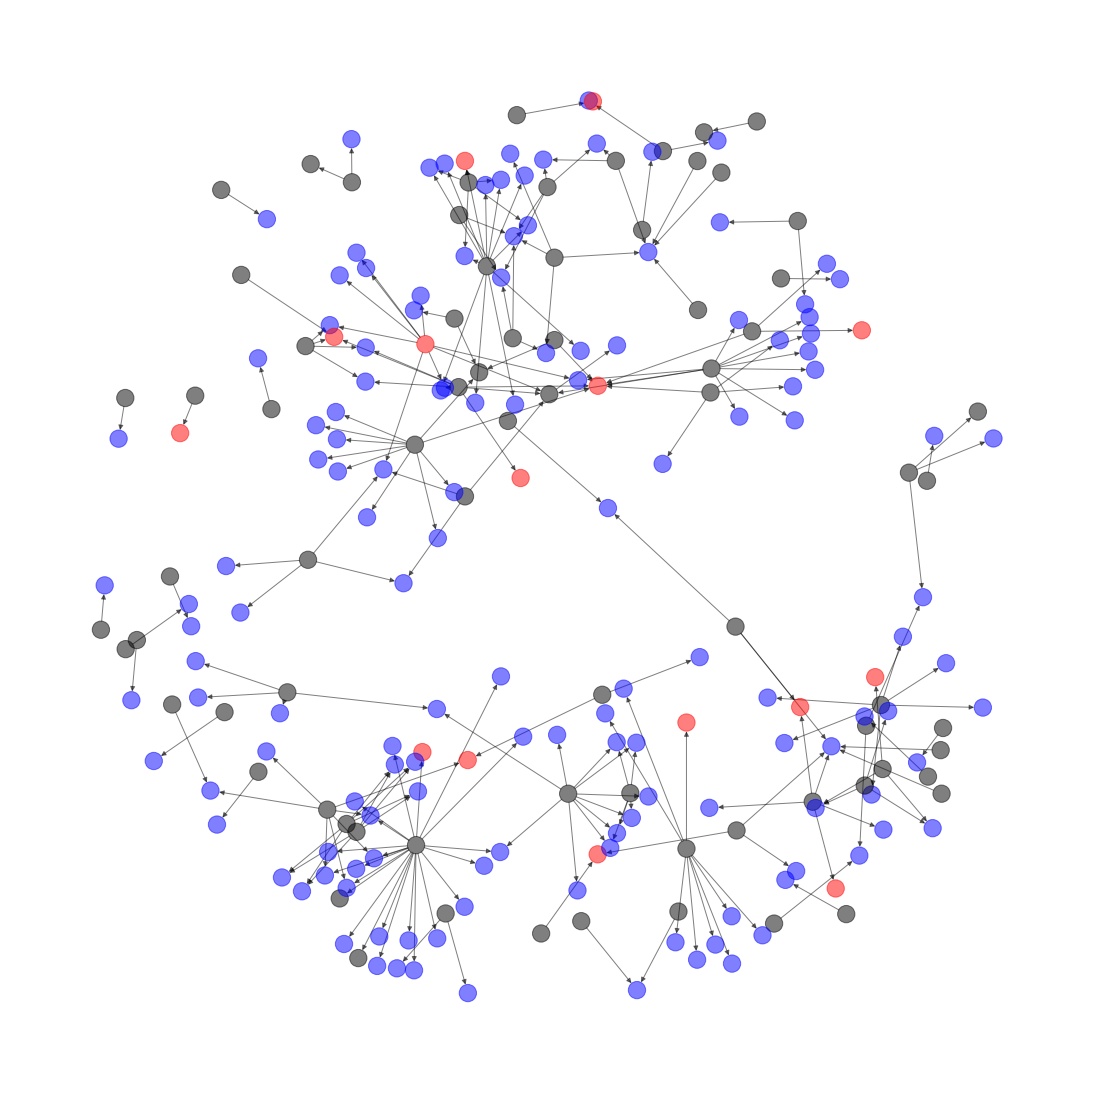

In [172]:
df1 = gisd_redlist_interactions_df.query("interactionTypeName == 'eats' & sourceTaxonSpeciesName != targetTaxonSpeciesName")[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']]

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G = nx.DiGraph(G)

plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

#pos = nx.spring_layout(G, k=0.2) # Calcula as posições onde os nós serão exibidos

# Pinta os nós das espécies em perigo de vermelho enquanto mantém os demais em azul
colors = []
critically_endangered_species = redlist_df.query("redlistCategory == 'Critically Endangered'")
invasive_species = gisd_df.query("Species == Species")
for node in G:
    if sum(critically_endangered_species.scientificName.str.contains(node)) > 0:
        colors.append('red')
    elif sum(invasive_species.Species.str.contains(node)) > 0:
        colors.append('black')
    else:
        colors.append('blue')

nx.draw(G, pos, node_color=colors, alpha = 0.5, edge_color='black') # Exibe o grafo

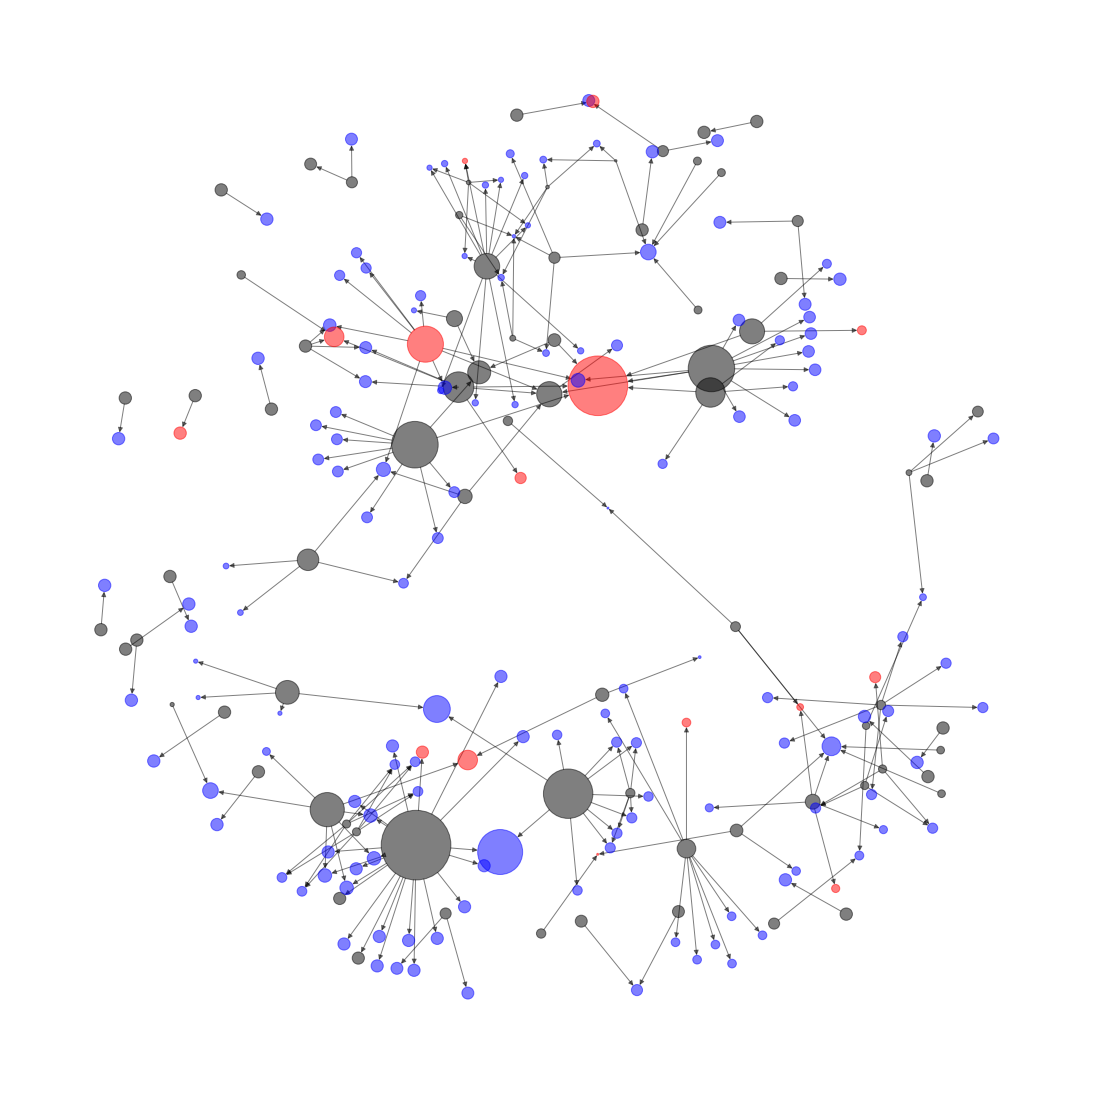

In [99]:
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

plt.figure(figsize=(15, 15))

global_eff = nx.global_efficiency(G)

vulnerability = []
for node in G.nodes():
    local_eff = nx.global_efficiency(G.subgraph(set(G)-{node}))
    vulnerability.append([abs(global_eff - local_eff), node])
    
node_sizes = [v[0] * 500000 for v in vulnerability]

G = nx.DiGraph(G)
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black')

<AxesSubplot:title={'center':'Espécies que mais influênciam na eficiencia global'}, ylabel='sourceTaxonSpeciesName'>

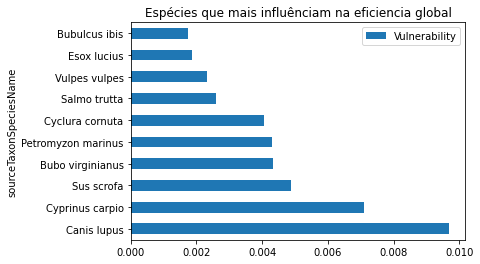

In [168]:
vulnerability_df = pd.DataFrame(vulnerability, columns=['Vulnerability','sourceTaxonSpeciesName'])
vulnerability_df = vulnerability_df.set_index('sourceTaxonSpeciesName')
vulnerability_df.sort_values(by='Vulnerability', ascending=False)[:10].plot.barh(title='Espécies que mais influênciam na eficiencia global')

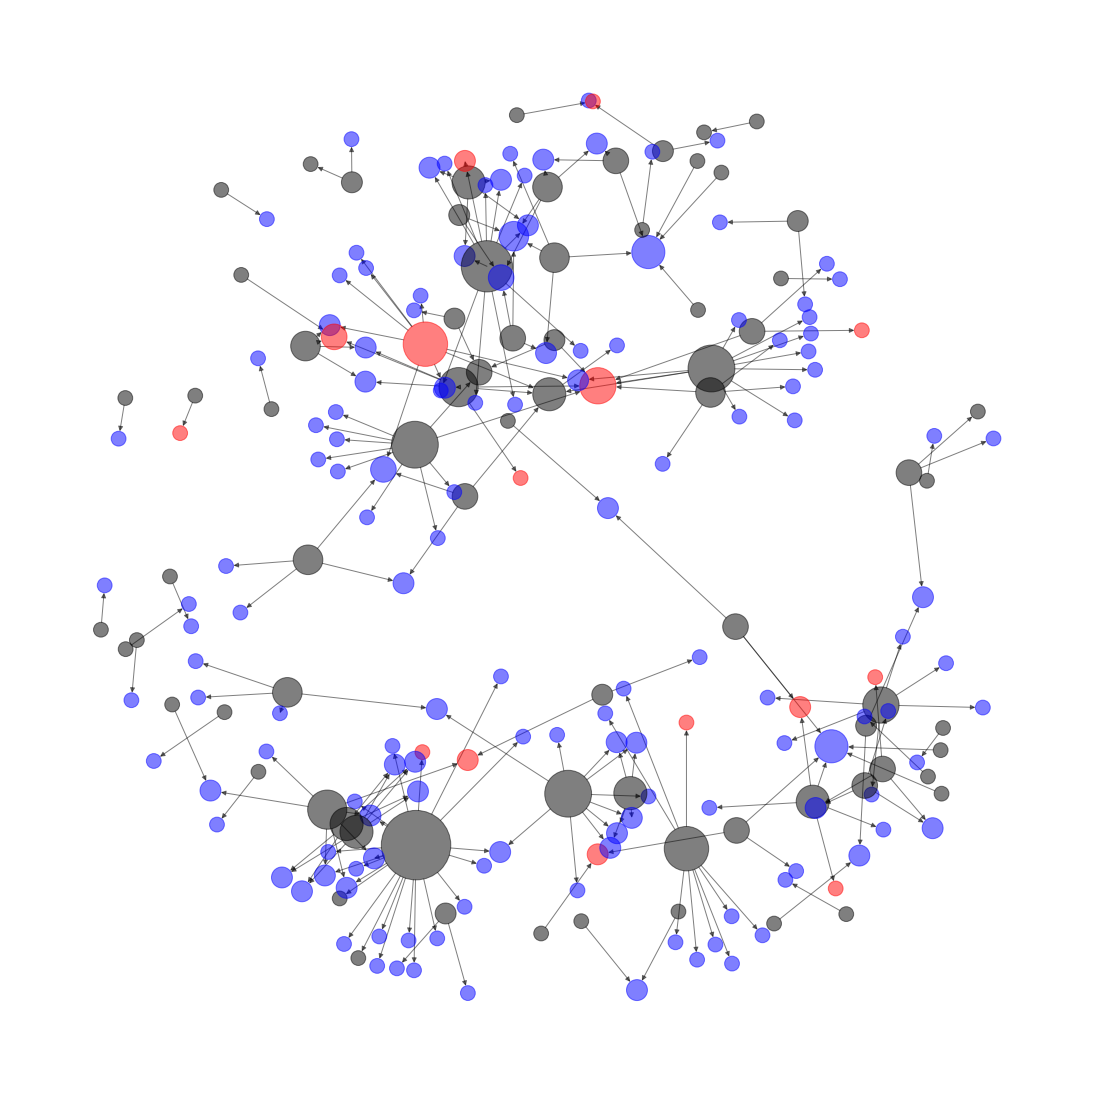

In [175]:
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G = nx.DiGraph(G)

plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

G = G.reverse()
degree_centrality = nx.degree_centrality(G)
G = G.reverse()

nx.set_node_attributes(G, degree_centrality, 'degree_centr')
node_sizes = [v * 50000 for v in degree_centrality.values()]

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black')

<AxesSubplot:title={'center':'Espécies com os maiores graus de centralidade'}>

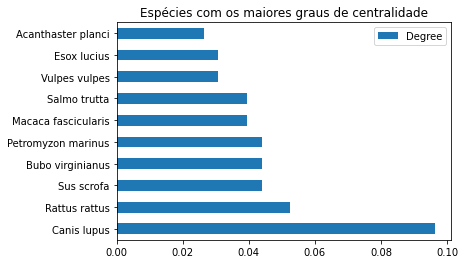

In [176]:
degree_df = pd.DataFrame.from_dict(degree_centrality, columns=['Degree'], orient='index')
degree_df.sort_values(by='Degree', ascending=False)[:10].plot.barh(title='Espécies com os maiores graus de centralidade')

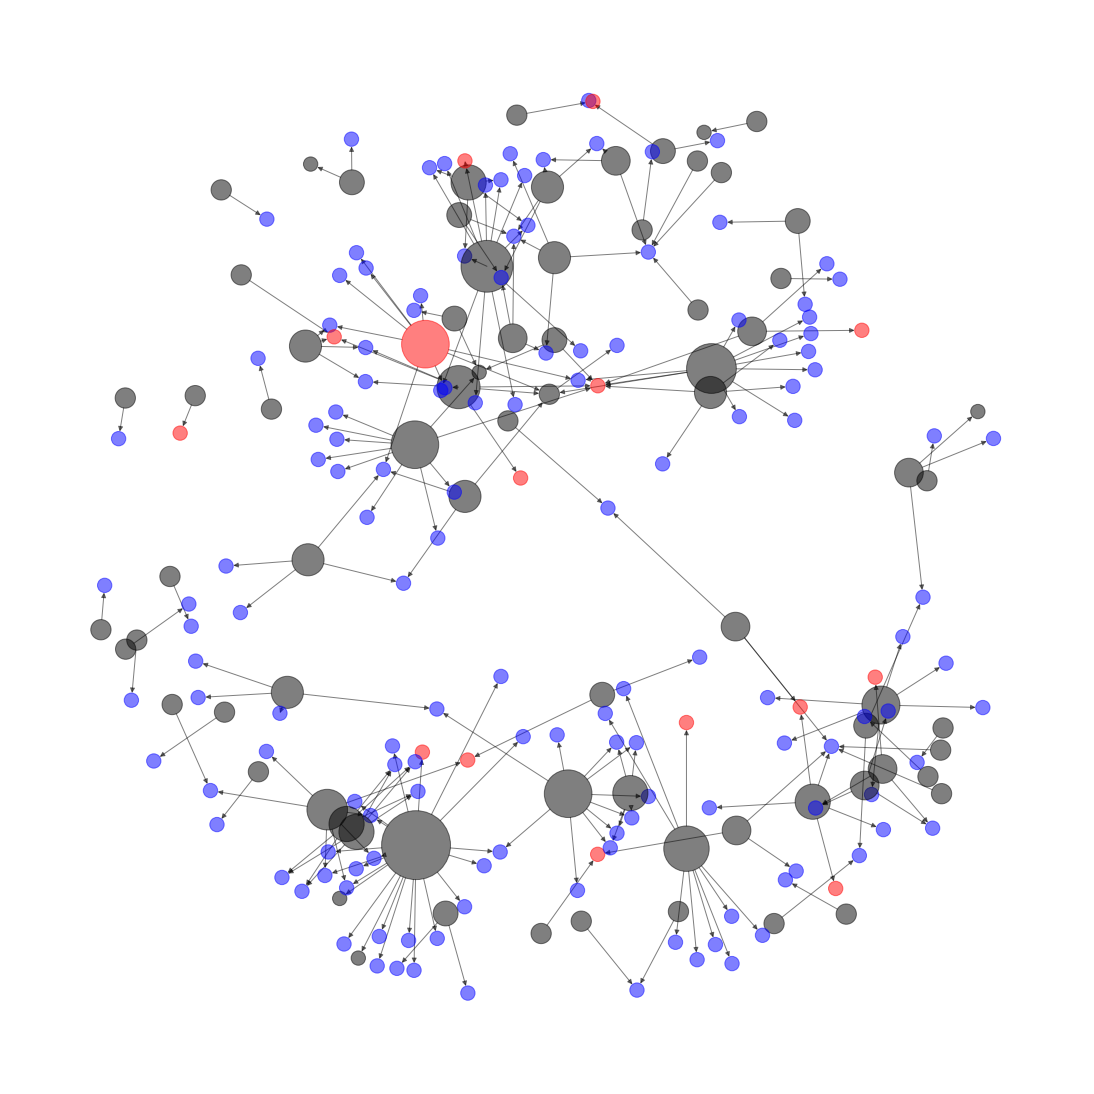

In [173]:
G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G = nx.DiGraph(G)

plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(df1, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

G = G.reverse()
degree_centrality=nx.katz_centrality(G,1)
G = G.reverse()

nx.set_node_attributes(G, degree_centrality, 'degree_centr')
node_sizes = [v * 10000 for v in degree_centrality.values()]

nx.draw(G, pos, node_size=node_sizes, node_color=colors, alpha = 0.5, edge_color='black') # Exibe o grafo

<AxesSubplot:title={'center':'Espécies com as maiores centralidades de autovetor'}>

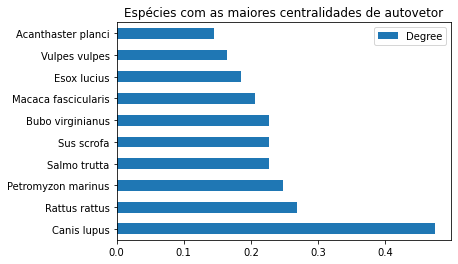

In [174]:
degree_df = pd.DataFrame.from_dict(degree_centrality, columns=['Degree'], orient='index')
degree_df.sort_values(by='Degree', ascending=False)[:10].plot.barh(title='Espécies com as maiores centralidades de autovetor')

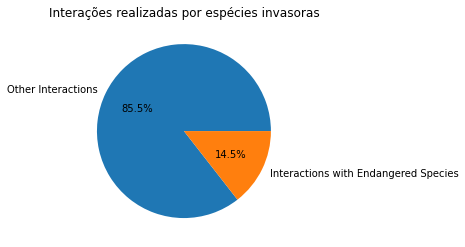

In [167]:
df2 = gisd_redlist_interactions_df.query("redlistCategory == 'Critically Endangered' & sourceTaxonSpeciesName != targetTaxonSpeciesName")[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']]
df3 = gisd_redlist_interactions_df.query("sourceTaxonSpeciesName != targetTaxonSpeciesName")[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']]

G1 = nx.from_pandas_edgelist(df2, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G2 = nx.from_pandas_edgelist(df3, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

df = pd.DataFrame({'Perc': [len(G2) - len(G1), len(G1)]},index=['Other Interactions', 'Interactions with Endangered Species'])
plot = df.plot.pie(title="Interações realizadas por espécies invasoras", y='Perc', autopct='%1.1f%%', ylabel='', legend=False)

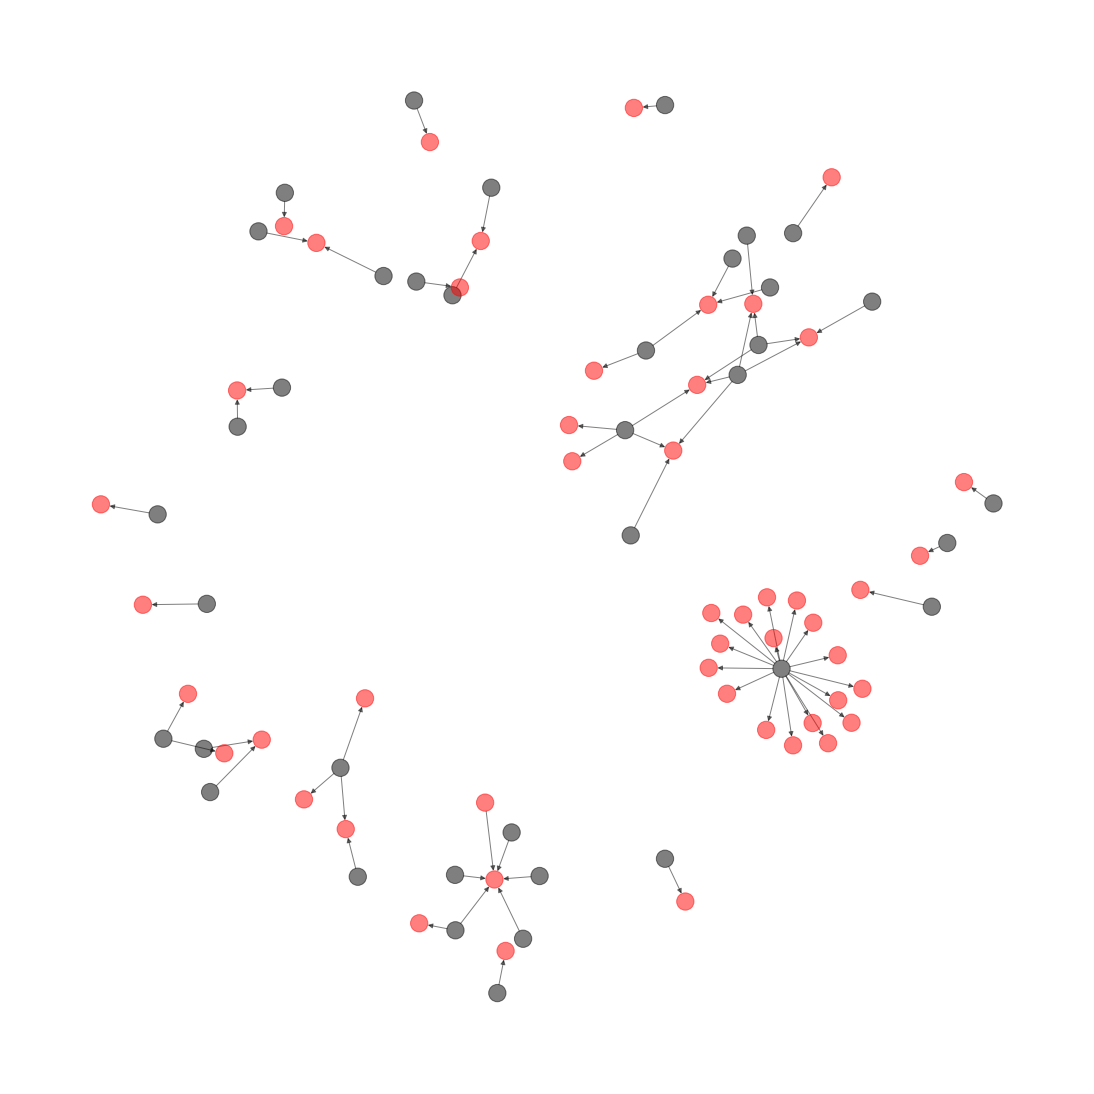

In [126]:
G = nx.from_pandas_edgelist(df2, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')
G = nx.DiGraph(G)

plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(df2, 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName', create_using=nx.DiGraph())

#pos2 = nx.spring_layout(G, k=0.2)

colors = []
critically_endangered_species = redlist_df.query("redlistCategory == 'Critically Endangered'")
invasive_species = gisd_df.query("Species == Species")
for node in G:
    if sum(critically_endangered_species.scientificName.str.contains(node)) > 0:
        colors.append('red')
    elif sum(invasive_species.Species.str.contains(node)) > 0:
        colors.append('black')
    else:
        colors.append('blue')

nx.draw(G, pos2, node_color=colors, alpha = 0.5, edge_color='black')

In [147]:
degrees = []
for node in G:
    if sum(invasive_species.Species.str.contains(node)) > 0:
        degrees.append([G.degree[node], node])
degrees_df = pd.DataFrame(degrees, columns=['Degree','sourceTaxonSpeciesName'])
degrees_df = degrees_df.sort_values(by='Degree', ascending=False)
degrees_df

,Degree,sourceTaxonSpeciesName
9,17,Batrachochytrium dendrobatidis
1,4,Hyphantria cunea
4,4,Lymantria dispar
0,3,Agrilus planipennis
31,3,West Nile virus
14,2,Esox lucius
11,2,Clarias gariepinus
19,2,Cercopithecus mona
8,1,Anser anser
24,1,Pylodictis olivaris


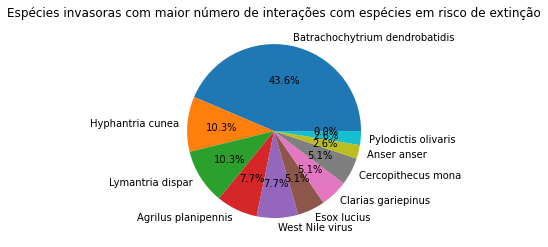

In [148]:
degrees_df = degrees_df.set_index('sourceTaxonSpeciesName')
degrees_df = degrees_df[:10]
def pie_plot_others(title, series, agg_after):
    others_row = pd.Series({'Others': series[agg_after:].sum()})
    plot_df = pd.concat([series[:agg_after], others_row])
    plot_df.plot.pie(title=title, autopct='%1.1f%%', ylabel='')

pie_plot_others('Espécies invasoras com maior número de interações com espécies em risco de extinção', degrees_df.Degree, 10)